In [3]:
! pip install yfinance

In [4]:
import yfinance as yf

In [5]:
df = yf.download("BTC-USD")

[*********************100%***********************]  1 of 1 completed


In [6]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2022-06-17,20385.718750,21243.312500,20326.519531,20471.482422,20471.482422,27132421514
2022-06-18,20473.425781,20736.041016,17708.623047,19017.642578,19017.642578,42009436760
2022-06-19,19010.902344,20683.822266,18067.152344,20553.271484,20553.271484,35329942625


In [7]:
df.to_csv(r"C:\Users\HP\Cryptocurrency price prediction\arima.csv")

In [8]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import math
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


<function matplotlib.pyplot.show(close=None, block=None)>

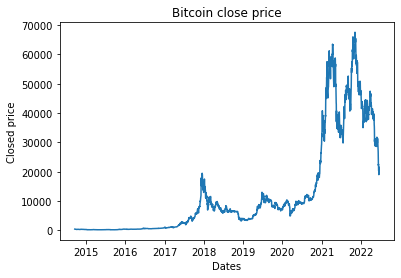

In [9]:
plt.plot(df.index,df['Adj Close'])
plt.title("Bitcoin close price")
plt.xlabel("Dates")
plt.ylabel("Closed price")
plt.show

In [10]:
# Train test split
# Here 0.7 = 70% data for training and remaining for testing
div_data = int(len(df)*0.7)
div_data

1984

In [6]:
# splited data into training and testing
training_data = list(df["Adj Close"])
#testing_data = list(df[div_data:]["Adj Close"])

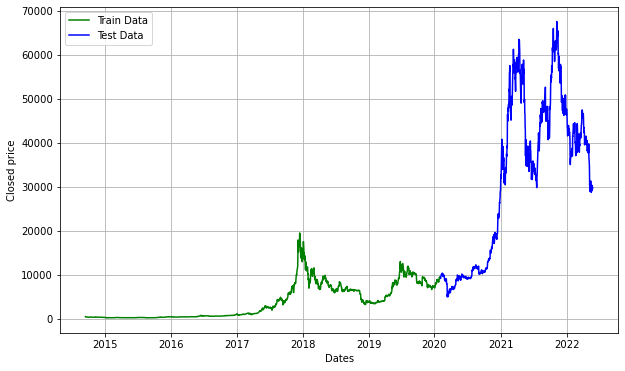

In [31]:
# split data into train and training set
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel("Dates")
plt.ylabel("Closed price")
plt.plot(df[0:div_data]["Adj Close"],'green', label="Train Data")
plt.plot(df[div_data:]["Adj Close"],'blue', label="Test Data")
plt.legend()

In [10]:
model_predictions =[]
n_test_obser = len(testing_data)

In [11]:
for i in range(n_test_obser):
    model = ARIMA(training_data, order=(4,1,0)) # here 4=p,1=d,0=q
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = list(output[0])[0]
    model_predictions.append(yhat)
    actual_test_value = testing_data[i]
    training_data.append(actual_test_value)


C:\Users\Gauri Mohite\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [12]:
model_predictions

[9305.955992302603,
 9179.78395143215,
 9641.643689258854,
 9728.150125471066,
 9809.320261751996,
 9849.846535784567,
 10124.918715251632,
 9840.416838520947,
 10233.953192046649,
 10310.814667620818,
 10227.559218745582,
 10307.830954519985,
 9867.2342835549,
 9960.18746095377,
 9675.278957208566,
 10193.703616261428,
 9602.698132826587,
 9641.232346253435,
 9669.111338065835,
 9689.89593335439,
 9941.75153875932,
 9633.525526785852,
 9345.180048792367,
 8798.165278140936,
 8813.347145399302,
 8685.497549946867,
 8629.514454865563,
 8568.172100468066,
 8892.084012359537,
 8784.196034388697,
 8764.191593734327,
 9080.831499175323,
 9123.935962693504,
 8908.72701660638,
 8070.186133768409,
 7938.442377805459,
 7924.236614267801,
 7954.376839417611,
 4859.283490135527,
 5659.466717862795,
 5160.402260858561,
 5508.668390274255,
 4988.946449970239,
 5247.837813574359,
 5233.04203144731,
 6225.558935695606,
 6183.9980989219775,
 6185.7562420241775,
 5802.48147976549,
 6437.410803470377,
 

In [13]:
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 2807
Model:                 ARIMA(4, 1, 0)   Log Likelihood              -22747.625
Method:                       css-mle   S.D. of innovations            800.272
Date:                Thu, 26 May 2022   AIC                          45507.249
Time:                        10:17:12   BIC                          45542.889
Sample:                             1   HQIC                         45520.112
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.3687     15.464      0.670      0.503     -19.941      40.678
ar.L1.D.y     -0.0323      0.019     -1.715      0.086      -0.069       0.005
ar.L2.D.y      0.0021      0.019      0.112      0.9

In [14]:
len(model_predictions)

843

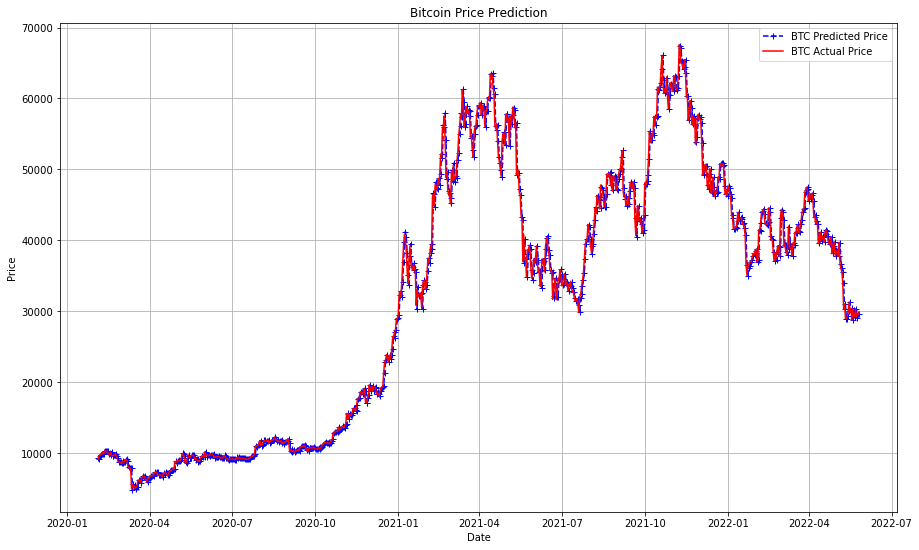

In [15]:
plt.figure(figsize=(15,9))
plt.grid(True)

date_range = df[div_data:].index
plt.plot(date_range,model_predictions, color='blue',marker='+',
         linestyle='dashed',label="BTC Predicted Price")
plt.plot(date_range,testing_data, color='red',label="BTC Actual Price")
plt.title("Bitcoin Price Prediction")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

In [16]:
# report performance
mape = np.mean(np.abs(np.array(model_predictions[:1])
                      - np.array(testing_data))/ np.abs(testing_data))
print('MAPE: '+ str(mape)) # mean absolute percentage error

MAPE: 0.5627787873781045


In [17]:
accuracy = 100-mape
accuracy

99.43722121262189

In [19]:
model_fit.get_forecast(steps=7)

AttributeError: 'ARIMAResults' object has no attribute 'get_forecast'

In [22]:
!pip install pmdarima

In [32]:
from pmdarima.arima import auto_arima
model = auto_arima(training_data)

In [33]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2809
Model:               SARIMAX(2, 1, 2)   Log Likelihood              -22743.430
Date:                Thu, 26 May 2022   AIC                          45498.860
Time:                        10:30:05   BIC                          45534.502
Sample:                             0   HQIC                         45511.724
                               - 2809                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     10.0353     17.192      0.584      0.559     -23.661      43.731
ar.L1          0.8262      0.008    109.336      0.000       0.811       0.841
ar.L2         -0.9551      0.007   -137.560      0.000      -0.969      -0.942
ma.L1         -0.8574      0.007   -123.206      0.000      -0.871      -0.844
ma.L2          0.9677      0.006    151.466      0.000       0.955       0.980
sigma2      6.425e+05   5831.440    110.180      0.000    6.31e+05    6.54e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):             33745.44
Prob(Q):                              0.77   Prob(JB):                         0.00
Heteroskedasticity (H):            4199.32   Skew:                            -0.30
Prob(H) (two-sided):                  0.00   Kurtosis:                        19.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [35]:
model.predict(n_periods=7)

array([29908.24644623, 29959.87904663, 29924.74299579, 29856.43222726,
       29843.58721948, 29908.25545592, 29983.98976856])

In [11]:
training_data[-1]

29005.703125

In [12]:
training_data[-2]

29562.361328125